In [8]:
import numpy as np
import matplotlib.pyplot as plt
import PlotSettings
from CrossSections import Transfer_SigmaV, Transfer_sigma
from scipy.optimize import minimize


# Fit $\chi^2$


We fit with an standard $\chi^2$ routine the viscosity cross section, defined by 

$$ \sigma_V = \int \sin^2{\theta} \frac{d\sigma}{d\Omega}, $$

and given in the Born limit, for a mediator of mass $M$ and a DM particle of mass $m_{\chi}$ with coupling $g'$, by

$$
\sigma_V = 6\sigma_0\left( \frac{w}{v} \right)^6 \left[\left(2 + \frac{v^2}{w^2} \right) \ln{1 + \frac{v^2}{w^2} } - 2 \frac{v^2}{w^2} \right] , 
$$
where $w = 300 \times (M/10~\mathrm{MeV})(10~\mathrm{GeV}/m_{\chi}) ~\mathrm{km/s} $, $\sigma_0 = 275.73 \left( \frac{\alpha'}{0.01}\right)^2 \left( \frac{m_{\chi}}{10} \right) \left( \frac{10~\mathrm{MeV}}{M}\right)$.

This is written in the code below:

In [9]:
def sigmaviscosity(V, mchi, mphi):
    alphax = 0.007
    w  = 300*(mphi/(10))*(10/(mchi))
    st = (275.73)*(alphax/0.01)**2*(mchi/10.0)*(10.0/(mphi))**(4)
    sv = 6*st*(w**6/(V**6))*((2+V**2/(w**2))*np.log(1+V**2/(w**2))-2*V**2/w**2)
    return sv

We can see the way the cross section depends on the parameters of the model with the following plot:

NameError: name 'V' is not defined

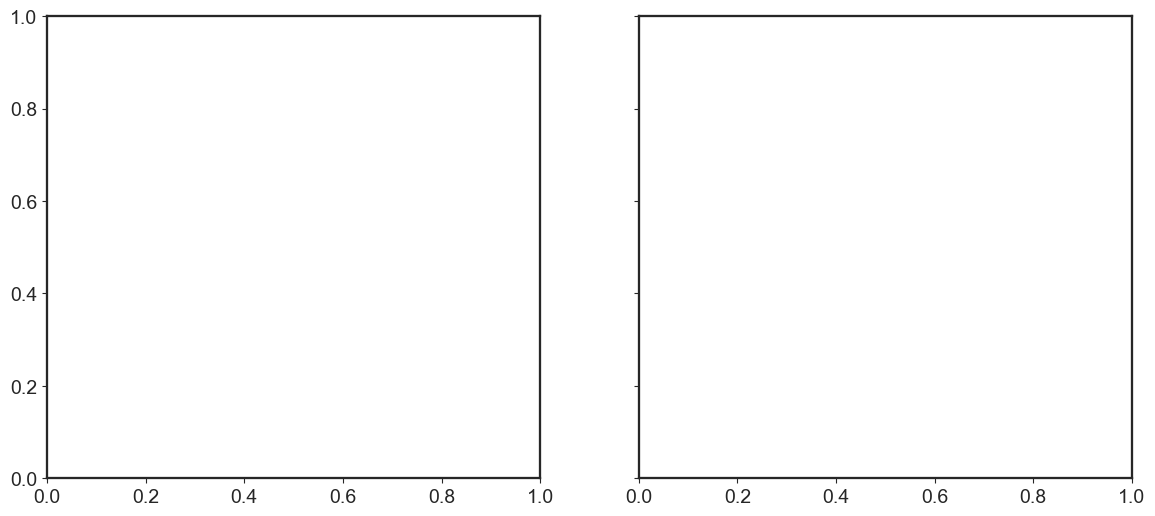

In [10]:

# Define the range for mchi and mphi
mchi_values = np.logspace(0, 5, 500)  # from 0.1 to 1000 in log scale
mphi_values = np.logspace(-2,3,50) 
V_values = np.logspace(1, 3, 50)  # from 10 to 1000 in log scale


# Create color gradient
colors = plt.cm.viridis(np.linspace(0.1, 1, len(V_values)))

# Create figure with two equal subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot on both subplots
for i, M in enumerate(mphi_values):
    sigmaV_values_left = [sigmaviscosity(10, mchi, M) for mchi in mchi_values]
    axs[0].plot(mchi_values, sigmaV_values_left, label=f'$M$ = {V:.0f} MeV', color=colors[i], alpha=0.8)

axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$m_{\chi}$ (GeV)', fontsize=14)
axs[0].set_ylabel(r'$\sigma_V ({\mathrm{GeV^{-2}}})$', fontsize=14)
axs[0].set_title(r'$\sigma_V$ as a function of $m_{\chi}$ for varying $V$', fontsize=16)
axs[0].grid(True, which="both", ls="--", linewidth=0.5)

for i, V in enumerate(V_values):
    sigmaV_values_right = [sigmaviscosity(mchi, 10, V) for mchi in mchi_values]
    axs[1].plot(mchi_values, sigmaV_values_right, label=f'$V$ = {V:.0f} ~km/s', color=colors[i], alpha=0.8)



axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$m_{\chi}$ (GeV)', fontsize=14)
axs[1].set_title(r'$\sigma_V$ as a function of $m_{\chi}$ for varying $V$', fontsize=16)
axs[1].grid(True, which="both", ls="--", linewidth=0.5)

# Legend
legend_labels = [f'$V$ = {V_values[0]:.0f} GeV', f'$V$ = {V_values[-1]:.0f} GeV']
handles, _ = axs[0].get_legend_handles_labels()
axs[0].legend([handles[0], handles[-1]], legend_labels, title='Mass $M$', fontsize=12, title_fontsize=12)
handles, _ = axs[1].get_legend_handles_labels()
axs[1].legend([handles[0], handles[-1]], legend_labels, title='Velocity $V$', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()


Now, this should be compare with the Transfer cross section as well, defined by 

$$
\sigma_T = \int (1- \cos{\theta})~\frac{d\sigma}{d\Omega} d\Omega
$$
and given as

$$
\sigma_T = 1
$$
Which we can plot in the following cell

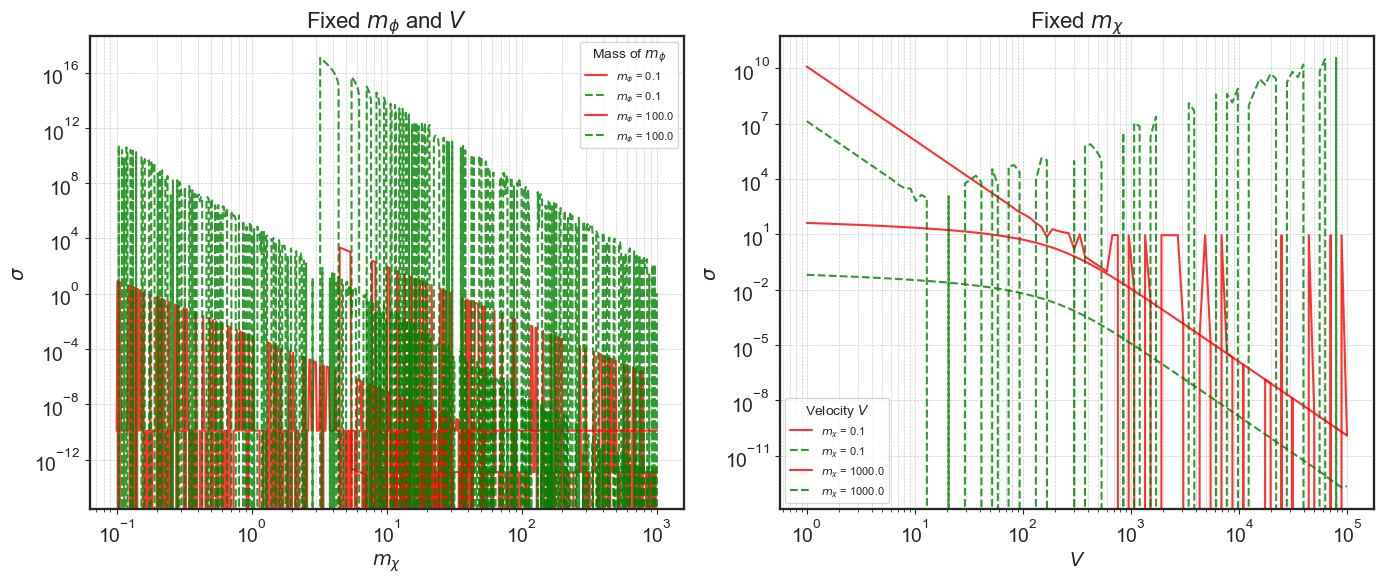

In [11]:
def sigmatransfer(V, mchi, mphi):
    alphax = 0.3
    w = 300 * (mphi / 10) * (10 / mchi)
    st = (275.73) * (alphax / 1e-2) ** 2 * (mchi / 10) * (10 / mphi) ** (4)
    sv = 2 * st * (w ** 4 / V ** 4) * (2 * np.log(1.0 + V ** 2 / (2 * w ** 2)) - np.log(1.0 + V ** 2 / (w ** 2)))
    return sv

# Define the range for mchi
mchi_values = np.logspace(-1, 3, 500)  # from 0.1 to 1000 in log scale
mphi_values = np.logspace(-1, 2, 50)  # from 0.1 to 100 in log scale
V_values = np.logspace(0, 5, 100)  # from 1 to 1e5 in log scale

# Create color map
colors = plt.cm.viridis(np.linspace(0.1, 1, len(mphi_values)))

# Left subplot
plt.figure(figsize=(14, 6))

# Fix mphi and V, change mchi
plt.subplot(1, 2, 1)
for i, mphi in enumerate([mphi_values[0], mphi_values[-1]]):
    sigmaV_values = [sigmaviscosity(mchi, mphi, V_values[-1]) for mchi in mchi_values]
    sigmat_values = [sigmatransfer(mchi, mphi, V_values[-1]) for mchi in mchi_values]
    
    plt.plot(mchi_values, sigmat_values, label=f'$m_\\phi$ = {mphi}', color='red', alpha=0.8)
    plt.plot(mchi_values, sigmaV_values, label=f'$m_\\phi$ = {mphi}', color='green', alpha=0.8, linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_{\chi}$', fontsize=14)
plt.ylabel(r'$\sigma$', fontsize=14)
plt.title('Fixed $m_\\phi$ and $V$', fontsize=16)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title='Mass of $m_{\phi}$', fontsize=8, title_fontsize=10)

# Right subplot
plt.subplot(1, 2, 2)
for i, mchi in enumerate([mchi_values[0], mchi_values[-1]]):
    sigmaV_values = [sigmaviscosity(mchi, mphi_values[-1], V) for V in V_values]
    sigmat_values = [sigmatransfer(mchi, mphi_values[-1], V) for V in V_values]
    
    plt.plot(V_values, sigmat_values, label=f'$m_\\chi$ = {mchi}', color='red', alpha=0.8)
    plt.plot(V_values, sigmaV_values, label=f'$m_\\chi$ = {mchi}', color='green', alpha=0.8, linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$V$', fontsize=14)
plt.ylabel(r'$\sigma$', fontsize=14)
plt.title('Fixed $m_\\chi$', fontsize=16)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend(title='Velocity $V$', fontsize=8, title_fontsize=10)

plt.tight_layout()
plt.show()


The standard $\chi^2$ routine is given in the following cell

In [13]:
# Define a chi square distribution fro any model and data set
def compute_chi2(free_params, model_Function, x, data, err):
    #Compute model
    M, m = free_params
    model = [model_Function(x, m, M) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y + chi2x

Import the data

## Fits con Datos de Camila

In [5]:
#Import Data from Camila Correa
CamilaData_Fig6 = np.loadtxt('Data-Sets/Data_Fig6_Correa_2021.txt')

VelocityData = CamilaData_Fig6[:,0]
Velocity_16_Percentile = CamilaData_Fig6[:,1]
Velocity_84_Percentile = CamilaData_Fig6[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig6[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig6[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig6[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


Fits for Figure 7:

In [14]:
CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


In [15]:

def Integrand_SigmaViscosity(v, v0, M, m):
    return sigmaviscosity(v, M, m)*v*np.exp(-0.5*v**2/v0**2)*v**2

from scipy.integrate import quad

def SigmaV(v0, M, m):
    sigma2_MB = v0**2*np.pi*(3*np.pi - 8)/np.pi
    vmax = 2*np.sqrt(sigma2_MB)

    Prefactor = 4*np.pi/((2*np.pi*v0**2)**1.5 * m)
    Integral = quad(Integrand_SigmaViscosity, 0.1, vmax, args=(v0, M, m))[0]
    return Prefactor*Integral

# Define a chi square distribution to use as input in emcee
#def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
#    #Compute model
#    M, m = free_params
#    model = [Camila_SigmaV(x, M, m) for x in x]
#
#    errx, erry = err
#    #chi2 computation
#    chi2y= np.sum((data-model)**2/erry**2)
#    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
#    return chi2y #+ chi2x

In [21]:
m_in = 1 # GeV
M_in = 10 # MeV
initial = [ M_in, m_in]


soln = minimize(compute_chi2, initial, args=(SigmaV, VelocityData, CrossSectionData, (VelocityData_Err, CrossSectionData_Err)), method='Nelder-Mead')

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf), sigmaviscosity, VelocityData, CrossSectionData, (VelocityData_Err, CrossSectionData_Err)))

C:\Users\Nicolás\AppData\Local\Temp\ipykernel_32196\292706818.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Integral = quad(Integrand_SigmaViscosity, 0.1, vmax, args=(v0, M, m))[0]
C:\Users\Nicolás\AppData\Local\Temp\ipykernel_32196\292706818.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Integral = quad(Integrand_SigmaViscosity, 0.1, vmax, args=(v0, M, m))[0]


Best Fit Parameters
M = 10.00 MeV
m = 1.04 GeV
Chi-squared: 30210.064368926793


## Fits con datos de Yu

In [20]:
# For the fit
OrderedData = np.loadtxt('Data-Sets/Datos_ordenados.csv')
x_data = OrderedData[:,0]
y_data = OrderedData[:,1]
err_x_data = OrderedData[:,2]
err_y_data = OrderedData[:,3]


In [11]:
M_ini, m_ini = 10, 10
initial = [M_ini, m_ini]
bnds= [(0.01, 1000), (0.01, 1000)]

soln = minimize(compute_chi2, initial, args=(sigm) method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))


Best Fit Parameters
M = 16.74 MeV
m = 9.96 GeV
Chi-squared: 1912472.709872893


Standard Cross Section but with Camila Data

In [12]:
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Normal_SigmaV(x, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


M_ini, m_ini = 1, 10
initial = [M_ini, m_ini]


soln = minimize(compute_chi2, initial, method='Nelder-Mead')

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 6.72 MeV
m = 36.57 GeV
Chi-squared: 14.501090608057646


## Particle Physics Cross Section with Camila Data

Data From Dwarfs

In [13]:
#Import Data from Camila Correa
CamilaData_Fig6 = np.loadtxt('Data-Sets/Data_Fig6_Correa_2021.txt')

VelocityData = CamilaData_Fig6[:,0]
Velocity_16_Percentile = CamilaData_Fig6[:,1]
Velocity_84_Percentile = CamilaData_Fig6[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig6[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig6[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig6[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2

In [14]:
# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Transfer_sigma(x, g=0.3, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


M_ini, m_ini = 10, 10
initial = [M_ini, m_ini]
bnds= [(1, 1000), (.01, 1000)]


soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} MeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 18.87 MeV
m = 135.54 GeV
Chi-squared: 15.035861064271808


Data From clusters

In [15]:
CamilaData_Fig7 = np.loadtxt('Data-Sets/Data_Fig7_Correa_2021.txt')
VelocityData = CamilaData_Fig7[:,0]
Velocity_16_Percentile = CamilaData_Fig7[:,1]
Velocity_84_Percentile = CamilaData_Fig7[:,2]
VelocityData_Err = ( (VelocityData - Velocity_16_Percentile) + (Velocity_84_Percentile - VelocityData) ) /2

CrossSectionData = CamilaData_Fig7[:,3]
CrossSectionData_16_Percentile = CamilaData_Fig7[:,4]
CrossSectionData_84_Percentile = CamilaData_Fig7[:,5]

CrossSectionData_Err = ((CrossSectionData - CrossSectionData_16_Percentile) + (CrossSectionData_84_Percentile - CrossSectionData) )/2


In [16]:
# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=VelocityData, data=CrossSectionData, err=(VelocityData_Err, CrossSectionData_Err)):
    #Compute model
    M, m = free_params
    model = [Transfer_SigmaV(x, g=0.3, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y #+ chi2x


M_ini, m_ini = 0.01, 100
initial = [M_ini, m_ini]
bnds= [(.001, 100), (.01, 1000)]


soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} GeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 0.04 GeV
m = 1000.00 GeV
Chi-squared: 131.15810169203868


Data from Yu

In [17]:
# For the fit
OrderedData = np.loadtxt('Data-Sets/Datos_ordenados.csv')
x_data = OrderedData[:,0]
y_data = OrderedData[:,1]
err_x_data = OrderedData[:,2]
err_y_data = OrderedData[:,3]

In [18]:

M_ini, m_ini = .01, 10
initial = [M_ini, m_ini]
bnds= [(0.001, 100), (0.01, 1000)]

# Define a chi square distribution to use as input in emcee
def compute_chi2(free_params, x=x_data, data=y_data, err=(err_x_data, err_y_data)):
    #Compute model
    M, m = free_params
    model = [Transfer_SigmaV(x, M=M, m=m) for x in x]

    errx, erry = err
    #chi2 computation
    chi2y= np.sum((data-model)**2/erry**2)
    chi2x= np.sum((x - 2*x*np.sqrt(2/np.pi))**2/errx**2)
    return chi2y + chi2x

soln = minimize(compute_chi2, initial, method='Nelder-Mead', bounds=bnds)

M_bf, m_bf = soln.x

print("Best Fit Parameters")
print('M = {0:.2f} GeV'.format(M_bf))
print('m = {0:.2f} GeV'.format(m_bf))
print("Chi-squared:", compute_chi2((M_bf, m_bf)))

Best Fit Parameters
M = 100.00 GeV
m = 1000.00 GeV
Chi-squared: 2186227.455061949
